Описание данных:
        Hours Studied   Sleep Hours  Sample Question Papers Practiced  \
count   10000.000000  10000.000000                      10000.000000   
mean        4.992900      6.530600                          4.583300   
std         2.589309      1.695863                          2.867348   
min         1.000000      4.000000                          0.000000   
25%         3.000000      5.000000                          2.000000   
50%         5.000000      7.000000                          5.000000   
75%         7.000000      8.000000                          7.000000   
max         9.000000      9.000000                          9.000000   

       Performance Index  
count       10000.000000  
mean           55.224800  
std            19.212558  
min            10.000000  
25%            40.000000  
50%            55.000000  
75%            71.000000  
max           100.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (t

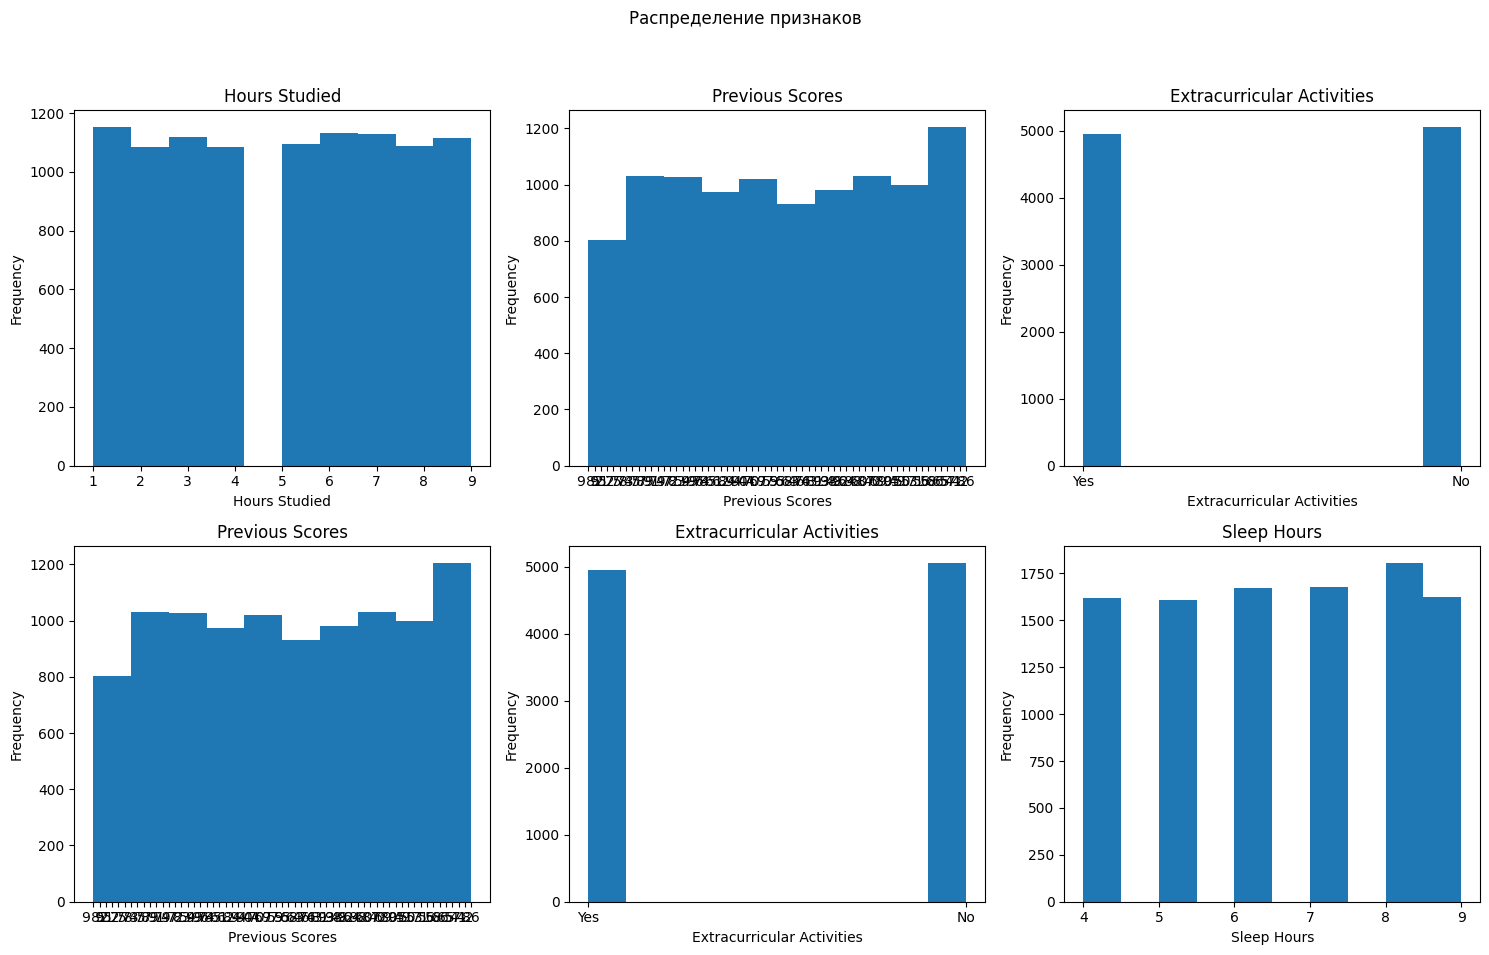

TypeError: can't multiply sequence by non-int of type 'float'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.interchange.dataframe_protocol import DataFrame

data = pd.read_csv("Student_Performance.csv")

print("Описание данных:\n", data.describe())
print("\nТипы данных и наличие пропусков:\n", data.info())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Распределение признаков")

# Рисовашки
for i in range(2):
    for j in range(3):
        axes[i, j].hist(data[data.keys()[i + j]], bins=10)
        axes[i, j].set_title(data.keys()[i + j])
        axes[i, j].set_xlabel(data.keys()[i + j])
        axes[i, j].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Преобразование к инт
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})


# разделение данных
def train_test_split(x: DataFrame, y: DataFrame, percentage_of_test) -> tuple[
    pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    index = int((1 - percentage_of_test) * len(x))
    return x[:index], x[index:], y[:index], y[index:]


x = data.drop('Performance Index', axis=1)
y = data['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(x, y, 0.2)


def linear_regression(x, y):
    # ради свободного члена
    x = np.c_[np.ones(x.shape[0]), x]
    # (X^T X)^(-1) X^T y
    x_transpose = x.T
    w = np.linalg.inv(x_transpose @ x) @ x_transpose @ y
    b = w[0]
    w = w[1:]
    return w, b


def predict(x, weights, b):
    return x @ weights + b


def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


def determinant(y_pred, y_test):
    res = sum([(y_test[i] - y_pred[i]) ** 2 for i in range(len(y_test))])
    y = 1 / len(y_test) * sum(y_test)
    tot = sum([(y_test[i] - y) ** 2 for i in range(len(y_test))])
    return 1 - (res / tot)


# модель 1 по всем
x1_train = x_train.copy()
x1_test = x_test.copy()
w1, b1 = linear_regression(x1_train.values, y_train.values)
y_pred1 = predict(x1_test.values, w1, b1)
print("Коэффицент детерминации для 1 модели", determinant(y_pred1, y_test.values))

# модель 2 - среднее часов сна, Образцы экзаменационных работ, которые выполнил студент
x2_train = x_train[['Sleep Hours', 'Sample Question Papers Practiced']].copy()
x2_test = x_test[['Sleep Hours', 'Sample Question Papers Practiced']].copy()
w2, b2 = linear_regression(x2_train.values, y_train.values)
y_pred2 = predict(x2_test.values, w2, b2)
print("Коэффицент детерминации для 2 модели", determinant(y_pred2, y_test.values))

# модель 3 - вместе с синтетикой
x3_train = x_train.copy()
x3_test = x_test.copy()
x3_train["synthetics"] = x3_train['Hours Studied'] / x3_train['Sleep Hours']
x3_test["synthetics"] = x3_test['Hours Studied'] / x3_test['Sleep Hours']
w3, b3 = linear_regression(x3_train.values, y_train.values)
y_pred3 = predict(x3_test.values, w3, b3)
print("Коэффицент детерминации для 3 модели", determinant(y_pred3, y_test.values))


# вывод коэффициентов модели 1
result1 = np.insert(w1, 0, b1)
col_names1 = ['b', 'Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
df1 = pd.DataFrame([result1], columns=col_names1)
df1

In [2]:
# вывод коэффициентов модели 2
result2 = np.insert(w2, 0, b2)
col_names2 = ['b', 'Sleep Hours', 'Sample Question Papers Practiced']
df2 = pd.DataFrame([result2], columns=col_names2)
df2

,b,Sleep Hours,Sample Question Papers Practiced
0,49.719753,0.640249,0.278155


In [3]:
# вывод коэффициентов модели 3
result3 = np.insert(w3, 0, b3)
col_names3 = ['b', 'Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'synthetics']
df3 = pd.DataFrame([result3], columns=col_names3)
df3

,b,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,synthetics
0,-33.860431,2.879871,1.018039,0.631593,0.450982,0.191471,-0.172316
